In [30]:
import warnings

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [41]:
#!pip install hvplot

In [60]:
path='/shared/CAREER_PWC/PlioMIP2/NCAR/'
fname='b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.TS.1101.1200.nc'
ds=xr.open_dataset(path+fname)
ds


<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1200)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1101-02-01 00:00:00 ... 1201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    TS         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...

In [75]:
ds_month=ds.groupby('time.month').mean()
ds_month
print(ds_month)

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, month: 12)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    TS       (month, lat, lon) float32 242.81935 242.19063 ... 272.84412


In [91]:
ds_month['TS'].sel(month=1)

<xarray.DataArray 'TS' (lat: 192, lon: 288)>
array([[242.81935, 242.19063, 242.28629, ..., 241.79759, 242.7575 ,
        242.54218],
       [243.6603 , 243.50284, 243.16147, ..., 243.55576, 243.51591,
        243.71744],
       [243.9553 , 243.883  , 243.89088, ..., 244.07254, 244.22057,
        244.19847],
       ...,
       [271.12302, 271.13773, 271.15173, ..., 271.08252, 271.09576,
        271.10864],
       [271.05673, 271.06204, 271.06757, ..., 271.03876, 271.04535,
        271.05118],
       [271.0119 , 271.01248, 271.01306, ..., 271.00958, 271.01044,
        271.01114]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    month    int64 1

Text(0.5, 0.98, 'Surface Temperatures (K)')

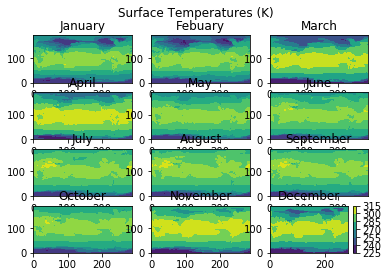

In [102]:
plt.subplot(4,3,1)
plt.contourf(ds_month['TS'].sel(month=1))
plt.title('January')
plt.subplot(4,3,2)
plt.contourf(ds_month['TS'].sel(month=2))
plt.title('Febuary')
plt.subplot(4,3,3)
plt.contourf(ds_month['TS'].sel(month=3))
plt.title('March')
plt.subplot(4,3,4)
plt.contourf(ds_month['TS'].sel(month=4))
plt.title('April')
plt.subplot(4,3,5)
plt.contourf(ds_month['TS'].sel(month=5))
plt.title('May')
plt.subplot(4,3,6)
plt.contourf(ds_month['TS'].sel(month=6))
plt.title('June')
plt.subplot(4,3,7)
plt.contourf(ds_month['TS'].sel(month=7))
plt.title('July')
plt.subplot(4,3,8)
plt.contourf(ds_month['TS'].sel(month=8))
plt.title('August')
plt.subplot(4,3,9)
plt.contourf(ds_month['TS'].sel(month=9))
plt.title('September')
plt.subplot(4,3,10)
plt.contourf(ds_month['TS'].sel(month=10))
plt.title('October')
plt.subplot(4,3,11)
plt.contourf(ds_month['TS'].sel(month=11))
plt.title('November')
plt.subplot(4,3,12)
plt.contourf(ds_month['TS'].sel(month=12))
plt.title('December')
plt.colorbar()
plt.suptitle('Surface Temperatures (K)')

Text(0.5, 0.98, 'Surface Temperature (K)')

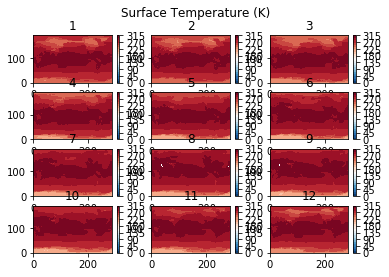

In [104]:
clevs=np.arange(0,330,15)
for i,month in enumerate(ds_month['month']):
    plt.subplot(4,3,i+1)
    plt.contourf(ds_month['TS'].sel(month=month),levels=clevs,cmap='RdBu_r')
    plt.title(month.values)
    plt.colorbar()
plt.suptitle('Land Surface Air Temperatures (K)')

Text(0.5, 0.98, 'Monthly Pliocene Land Surface Temperatures')

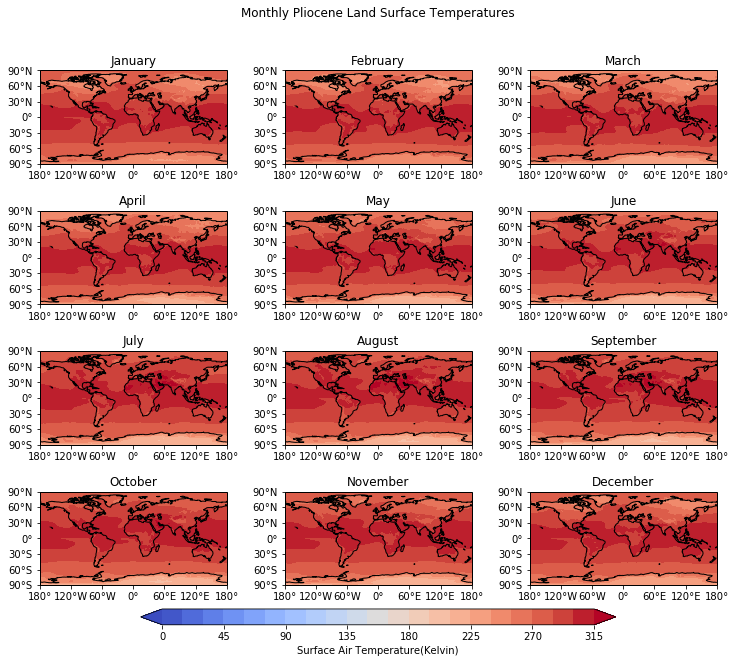

In [125]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(ds_month['month']):
        # Select the season
        data=ds_month['TS'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_month['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_month['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        cellmonth=['January','February','March','April','May','June','July','August','September','October','November','December']
#for j in range(0,12):
        #plt.title(cellmonth[i])
        axs[i].set_title(cellmonth[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Surface Air Temperature(Kelvin)')

# Add a big title at the top
plt.suptitle('Monthly Pliocene Land Surface Temperatures')
plt.savefig("assignment2.png");

# Seasons

In [77]:
ds_seas=ds.groupby('time.season').mean()
ds_seas

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, season: 4)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    TS       (season, lat, lon) float32 239.37776 238.81364 ... 275.45978

Text(0.5, 0.98, 'Surface Temperatures (K)')

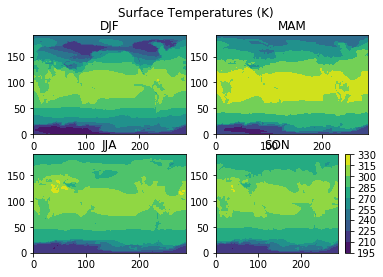

In [34]:
plt.subplot(2,2,1)
plt.contourf(ds_seas['TS'].sel(season='DJF'))
plt.title('DJF')
plt.subplot(2,2,2)
plt.contourf(ds_seas['TS'].sel(season='MAM'))
plt.title('MAM')
plt.subplot(2,2,3)
plt.contourf(ds_seas['TS'].sel(season='JJA'))
plt.title('JJA')
plt.subplot(2,2,4)
plt.contourf(ds_seas['TS'].sel(season='SON'))
plt.title('SON')
plt.colorbar()
plt.suptitle('Surface Temperatures (K)')

Text(0.5, 0.98, 'Surface Temperatures (K)')

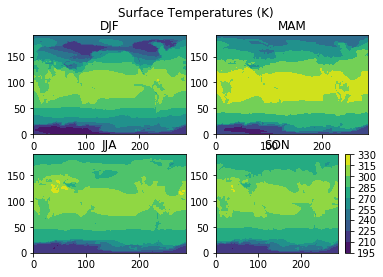

In [34]:
plt.subplot(2,2,1)
plt.contourf(ds_seas['TS'].sel(season='DJF'))
plt.title('DJF')
plt.subplot(2,2,2)
plt.contourf(ds_seas['TS'].sel(season='MAM'))
plt.title('MAM')
plt.subplot(2,2,3)
plt.contourf(ds_seas['TS'].sel(season='JJA'))
plt.title('JJA')
plt.subplot(2,2,4)
plt.contourf(ds_seas['TS'].sel(season='SON'))
plt.title('SON')
plt.colorbar()
plt.suptitle('Surface Temperatures (K)')

Text(0.5, 0.98, 'Surface Temperature (K)')

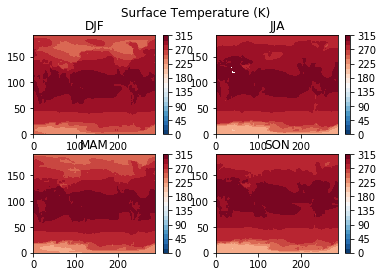

In [35]:
clevs=np.arange(0,330,15)
for i,seas in enumerate(ds_seas['season']):
    plt.subplot(2,2,i+1)
    plt.contourf(ds_seas['TS'].sel(season=seas),levels=clevs,cmap='RdBu_r')
    plt.title(seas.values)
    plt.colorbar()
plt.suptitle('Surface Temperature (K)')

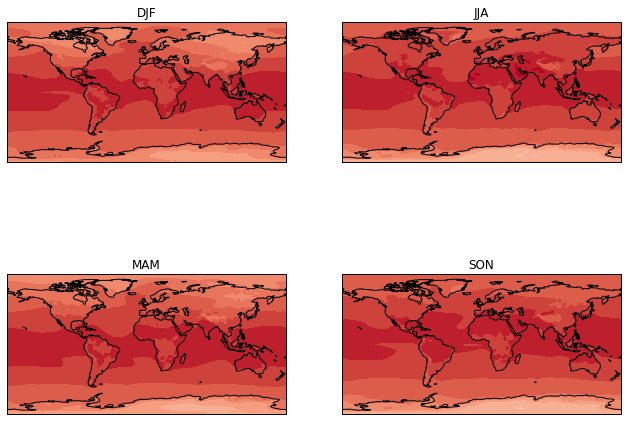

In [36]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,seas in enumerate(ds_seas['season']):

        # Select the season
        data=ds_seas['TS'].sel(season=seas)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_seas['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_seas['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        # Title each subplot with the name of the model
        axs[i].set_title(seas.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()


Text(0.5, 0.98, 'Pliocene Land Surface Temperatures')

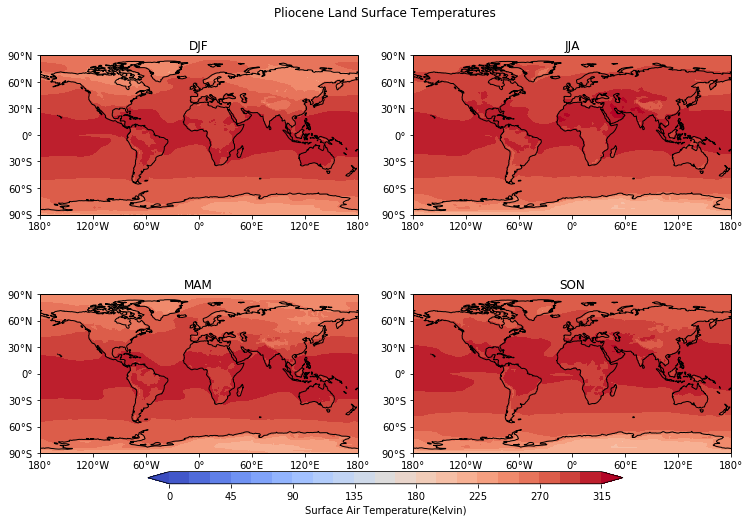

In [37]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,seas in enumerate(ds_seas['season']):

        # Select the season
        data=ds_seas['TS'].sel(season=seas)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_seas['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_seas['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(seas.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Surface Air Temperature(Kelvin)')

# Add a big title at the top
plt.suptitle('Pliocene Land Surface Temperatures')

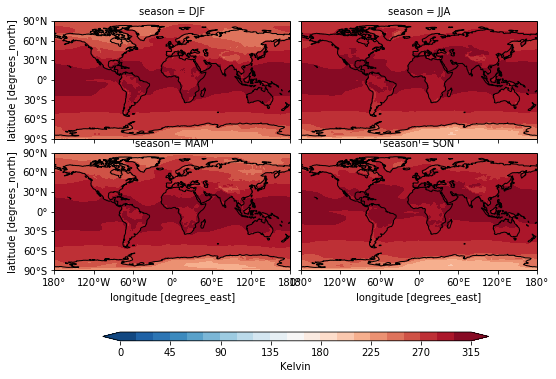

In [38]:
fg = ds_seas['TS'].plot.contourf(
    levels=clevs,
    row='season',
    col_wrap=2,
    robust=True,
    cmap='RdBu_r',
    extend='both',
    subplot_kws={"projection": ccrs.PlateCarree()},
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "label": "Kelvin",
    },
)

for ax in fg.axes.flat:
    ax.coastlines()
    
    # Longitude labels
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

In [62]:

fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,  # each row has a maximum of 4 columns
)

NameError: name 'monthly_means' is not defined